# Overview Demo #

### All Zipcodes ###

In [56]:
from datascience import * 
import numpy as np
import matplotlib 
%matplotlib inline

## Party v Gender ##

In [51]:
party_gender = Table().read_table("Party v Gender.csv")

In [52]:
party_gender

Gender,D,R,DS,Zipcode
M,5594,1068,2153,90025
F,4112,1323,1810,90025
M,4405,3485,2049,90266
F,3085,3913,1847,90266
M,4025,1887,1294,90272
F,2770,1978,1179,90272
M,2412,3864,1275,90274
F,1693,3657,1289,90274
M,4452,1812,1565,91505
F,3397,1747,1585,91505


### Total Voter Count ###

Total Democrats:  100898
Total Republicans:  64132
Total Did Not State:  51008


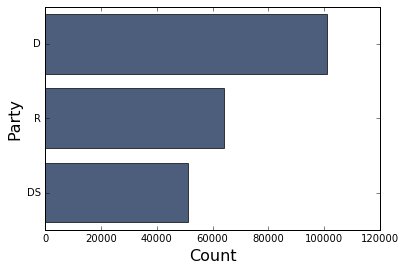

In [53]:
# Table for number of Democrats, Republicans, Did not State in all given zipcodes
totals = Table().with_columns([
        'Party', ['D', 'R', 'DS'],
        'Count', [sum(party_gender.column('D')), sum(party_gender.column('R')), sum(party_gender.column('DS'))]
    ])
# Print counts
print('Total Democrats: ', totals['Count'][0])
print('Total Republicans: ', totals['Count'][1])
print('Total Did Not State: ', totals['Count'][2])

# Create bar graph 
totals.barh('Party')

In [54]:
# Table for number of Females/Males per Party
pg = party_gender.select(['Gender','D','R','DS']).group('Gender', collect=sum)
pg = pg.relabeled('D sum', 'D').relabeled('R sum', 'R').relabeled('DS sum', 'DS')
pg = Table().with_columns(["Party", ["Democrat", "Republican", "Did not state"],
                          "Male", pg.row(0)[1:],
                          "Female", pg.row(1)[1:]])
pg

Party,Male,Female
Democrat,47889,53009
Republican,32205,31927
Did not state,24658,26350


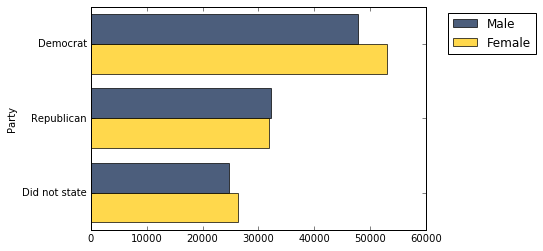

In [55]:
pg.barh("Party")

## Vote By Mail Demo ##

### Submission Time Key
AE -	Always early

SE -	Sometimes Early

EL -	Early or Late

SL -	Sometimes Late

AL -	Always Late

In [39]:
vbm_age_time = 'AE'

In [40]:
vbm_age = Table().read_table("VBM_age.csv").relabeled('Unnamed: 0', 'Age')
vbm_age.where(vbm_age['Submission Time'] == vbm_age_time)

Age,D,R,DS/O,Submission Time
Age1824,41,22,31,AE
Age2534,200,77,120,AE
Age3544,253,136,196,AE
Age4554,353,274,197,AE
Age5564,406,298,214,AE
Age65NA,1010,833,422,AE


In [41]:
vbm_age.drop('Submission Time').barh('Age')